In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("Iris.csv")

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [10]:
df.shape

(150, 6)

In [13]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
df["Species"] = df["Species"].map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})

In [17]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [18]:
df.drop(["Id"], axis=1, inplace=True)

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
df1 = df
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
# breaking dataset into features and labels and taking column values
X = df1.drop(["Species"], axis=1).values
y = df1["Species"].values

In [24]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [25]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
scaler = StandardScaler()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [32]:
X_train = torch.FloatTensor(X_train)  # Float Tensor can represent integers and fractional numbers, used for floating point arithmetic like activations, network weights and gradients
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)  # Long Tensor can represent only integers and no fraction, used for class labels, indexing and where integer values are needed
y_test = torch.LongTensor(y_test)

In [127]:
# Building Model
class ModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=4, out_features=128)
    self.layer_2 = nn.Linear(in_features=128, out_features=64)
    self.layer_3 = nn.Linear(in_features=64, out_features=32)
    self.layer_4 = nn.Linear(in_features=32, out_features=16)
    self.layer_5 = nn.Linear(in_features=16, out_features=3)
    self.relu = nn.ReLU()

  def forward(self, x):
    output = self.relu(self.layer_1(x))
    output = self.relu(self.layer_2(output))
    output = self.relu(self.layer_3(output))
    output = self.relu(self.layer_4(output))
    output = self.relu(self.layer_5(output))
    return output

model_0 = ModelV0()
model_0

ModelV0(
  (layer_1): Linear(in_features=4, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=32, bias=True)
  (layer_4): Linear(in_features=32, out_features=16, bias=True)
  (layer_5): Linear(in_features=16, out_features=3, bias=True)
  (relu): ReLU()
)

In [44]:
# Accuracy Function
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  accuracy = (correct/len(y_pred)) * 100
  return accuracy

In [128]:
# Setting up optimizer and loss function
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

In [134]:
# Train and test the model
def train(model, loss_func, optimizer, X_train, y_train, X_test, y_test, num_epochs):
  for epoch in range(num_epochs):
    # Train
    model.train()
    y_pred_train = model(X_train)
    train_loss = loss(y_pred_train, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Test
    y_pred_test = model(X_test)
    test_loss = loss(y_pred_test, y_test)
    train_losses[epoch] = train_loss.item()
    test_losses[epoch] = test_loss.item()

    if epoch % 100 == 0:
      print(f"Epoch:{epoch}/{num_epochs} | Train Loss:{train_loss:.4f} | Test Loss:{test_loss:.4f}")


In [131]:
num_epochs = 6000
train_losses = np.zeros(num_epochs)
test_losses = np.zeros(num_epochs)
train(model=model_0, loss_func=loss_func, optimizer=optimizer,
      X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, num_epochs=num_epochs)

Epoch:0/6000 | Train Loss:1.1040 | Test Loss:1.1007
Epoch:100/6000 | Train Loss:0.4049 | Test Loss:0.4728
Epoch:200/6000 | Train Loss:0.0703 | Test Loss:0.0510
Epoch:300/6000 | Train Loss:0.0558 | Test Loss:0.0455
Epoch:400/6000 | Train Loss:0.0530 | Test Loss:0.0357
Epoch:500/6000 | Train Loss:0.0509 | Test Loss:0.0303
Epoch:600/6000 | Train Loss:0.0492 | Test Loss:0.0249
Epoch:700/6000 | Train Loss:0.0466 | Test Loss:0.0204
Epoch:800/6000 | Train Loss:0.0443 | Test Loss:0.0158
Epoch:900/6000 | Train Loss:0.0416 | Test Loss:0.0139
Epoch:1000/6000 | Train Loss:0.0404 | Test Loss:0.0064
Epoch:1100/6000 | Train Loss:0.0361 | Test Loss:0.0087
Epoch:1200/6000 | Train Loss:0.0328 | Test Loss:0.0067
Epoch:1300/6000 | Train Loss:0.0308 | Test Loss:0.0035
Epoch:1400/6000 | Train Loss:0.0293 | Test Loss:0.0029
Epoch:1500/6000 | Train Loss:0.0285 | Test Loss:0.0042
Epoch:1600/6000 | Train Loss:0.0286 | Test Loss:0.0022
Epoch:1700/6000 | Train Loss:0.0246 | Test Loss:0.0017
Epoch:1800/6000 | Trai

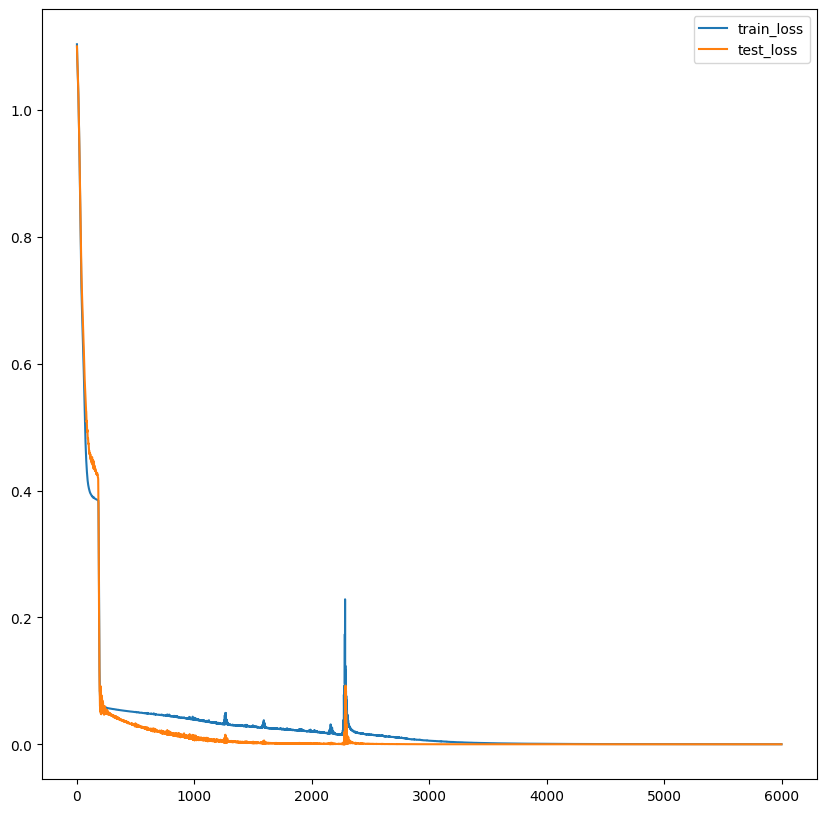

In [133]:
plt.figure(figsize=(10, 10))
plt.plot(train_losses, label="train_loss")
plt.plot(test_losses, label="test_loss")
plt.legend()
plt.show;

In [135]:
# Accuracy of the model
train_prediction = []
test_prediction = []
with torch.no_grad():
  train_prediction = model_0(X_train)
  test_prediction = model_0(X_test)

In [141]:
def accuracy_fn(prediction_array, true_array):
  if len(prediction_array) != len(true_array):
    return False
  prediction_array = prediction_array.numpy()
  true_array = true_array.numpy()
  final_prediction = []

  for i in range(len(prediction_array)):
    final_prediction.append(np.argmax(prediction_array[i]))
    count = 0
  for i in range(len(true_array)):
    if final_prediction[i] == true_array[i]:
      count += 1

  accuracy = (count/len(final_prediction)) * 100
  return accuracy

In [142]:
train_acc = accuracy_fn(train_prediction, y_train)
test_acc = accuracy_fn(test_prediction, y_test)

In [143]:
print(f"Train Accuracy: {train_acc}%")
print(f"Test Accuracy: {test_acc}%")

Train Accuracy: 100.0%
Test Accuracy: 100.0%
